In [6]:
import nltk #Python library for NLP
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
path = "../00_Data/"
filename = 'text.csv'
text = pd.read_csv(path+filename)
text.tail()

,Unnamed: 0,text,label
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


In [8]:
text = text[['text', 'label']]
# The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)
label_dictionary = {0: 'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

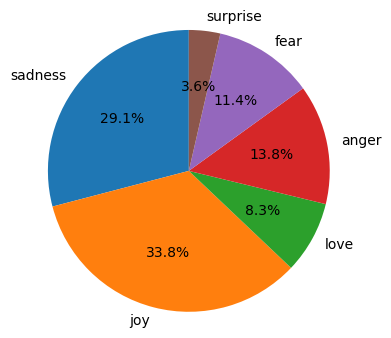

In [9]:
plt.figure(figsize=(4,4))
labels = label_dictionary.values()
# get the size of each label
sizes = [ text[text['label']==i].shape[0] for i in range(6) ]
plt.pie(sizes, labels=labels, startangle=90, shadow=False, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

There is an unbalanced dataset, more than half of the data are labeled as 'sadness' and 'joy, while only 11% are labeled as fear and a small 3.6% are labeled as 'surprise.

## Printing some of the tweets

In [10]:
text['text'][0], text['text'][1], text['text'][3], text['text'][1000]

('i just feel really helpless and heavy hearted',
 'ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing',
 'i dont know i feel so lost',
 'im really feeling the pressure to provide justin friendly content')

Tweets are already lower-cased in the printed sample. One observation is the presence of abbreviations such as 'uni' instead of university, or the word 'expo'.
The data do not seem to have url and emojis in them.
Nevertheless we clean for these to be on the safe side

In [53]:
# surprise = text[text['label']==5]
# surprise = surprise.reset_index(drop=True)
# surprise['text'][0]

'im forever taking some time out to have a lie down because i feel weird'

# Pre-process the data

In [11]:
y = text['label']
X = text['text'].tolist()
X[0]

'i just feel really helpless and heavy hearted'

## 1) Remove hyper-link, twitter style

In [12]:
import re
import string # for string operations
from nltk.tokenize import TweetTokenizer

# download the stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stopwords_eng = stopwords.words('english')
print(stopwords_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

 The tweet sample had 'im' instead of "i'm". Adding these to the stopwords

In [28]:
more_stopwords = ['im', 'wont', 'werent', 'wasnt', 'isnt', 'arent', 'dont', 'doesnt', 'hasnt', 'would']
stopwords_eng += more_stopwords
print(stopwords_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
# we may need an adiitional step to remove numbers; with re seems the easiest way

In [ ]:
# Make a dictionary of abbreviations common in twitter
abbr = {'u':'you', 'ur':'your', 'r':'are', 'idk':'i dont know', 'uni':'university', 'expo':'exposition',\
        'lol':'laughing out loud', 'wud':'would', \
        'dm':'direct message', 'cx':'correction', 'irl':'in real life', 'omg':'oh my god', }

In [ ]:
misspelling = ['becuase':'because']

In [17]:
# this part takes a while to run (2-3 min)
X2 = []
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
stemmer = PorterStemmer() # this used Porter Stemming algorithm
for x in X:
    # remove hyperlink and twitter style
    x2 = re.sub(r'https?://[^\s\n\r]+', '', x) #remove hyperlink (anything after https)
    x2 = re.sub(r'#', '', x2) # remove "#" from word
    x2 = re.sub(r'^RT[\s]+', '', x2) # remove "RT" (old-style retweet)
    # lowercase x
    x2 = x2.lower()
    # tokenize tweets
    x2_tokens = tokenizer.tokenize(x2)
    # remove stopwords & punctuations
    clean_x2 = []
    for word in x2_tokens: # Go through every word in th tokens list
        # remove stopwords & remove punctuations
        if (word not in stopwords_eng and word not in string.punctuation):
            # stem the word
            stem_word = stemmer.stem(word)
            clean_x2.append(stem_word)  

    X2.append(clean_x2)

In [95]:
# file = open(path+'clean_text.txt', 'w')
# for item in X2:
#     file.write(item)
# file.close()
    

TypeError: write() argument must be str, not list

## Word Cloud

In [2]:
# pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 787.7 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.2 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
from wordcloud import WordCloud
from nltk import word_tokenize, FreqDist

In [38]:
text['tokenized'] = X2
text.tail()

,text,label,tokenized
416804,i feel like telling these horny devils to find...,2,"[feel, like, tell, horni, devil, find, site, s..."
416805,i began to realize that when i was feeling agi...,3,"[began, realiz, feel, agit, restless, would, t..."
416806,i feel very curious be why previous early dawn...,5,"[feel, curiou, previou, earli, dawn, time, see..."
416807,i feel that becuase of the tyranical nature of...,3,"[feel, becuas, tyran, natur, govern, el, salva..."
416808,i think that after i had spent some time inves...,5,"[think, spent, time, investig, surround, thing..."


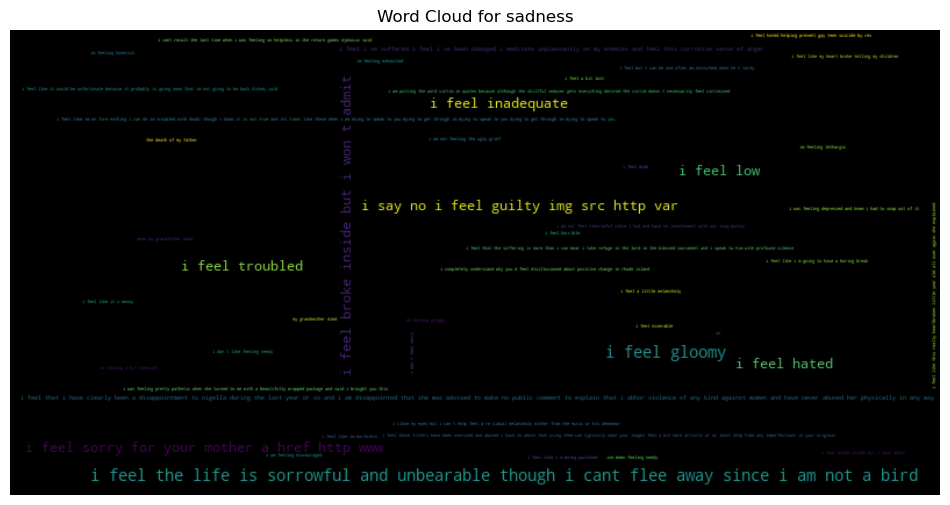

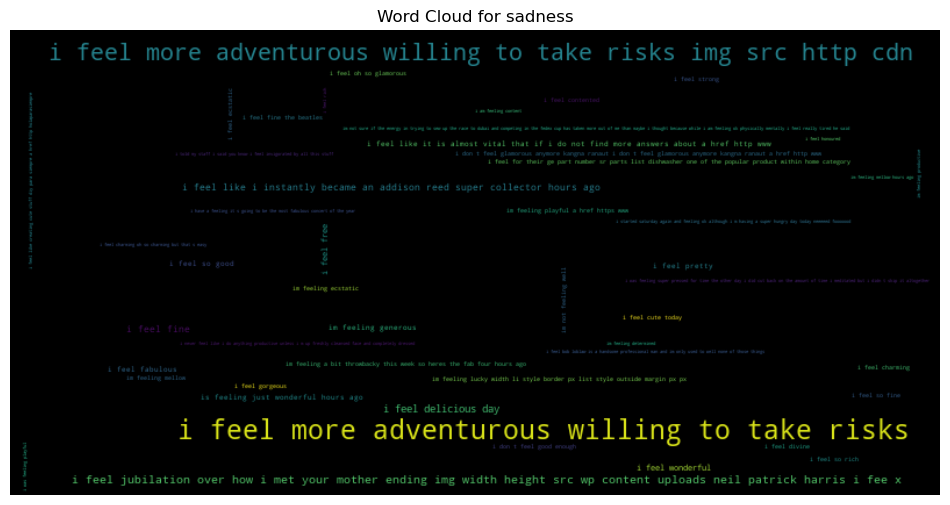

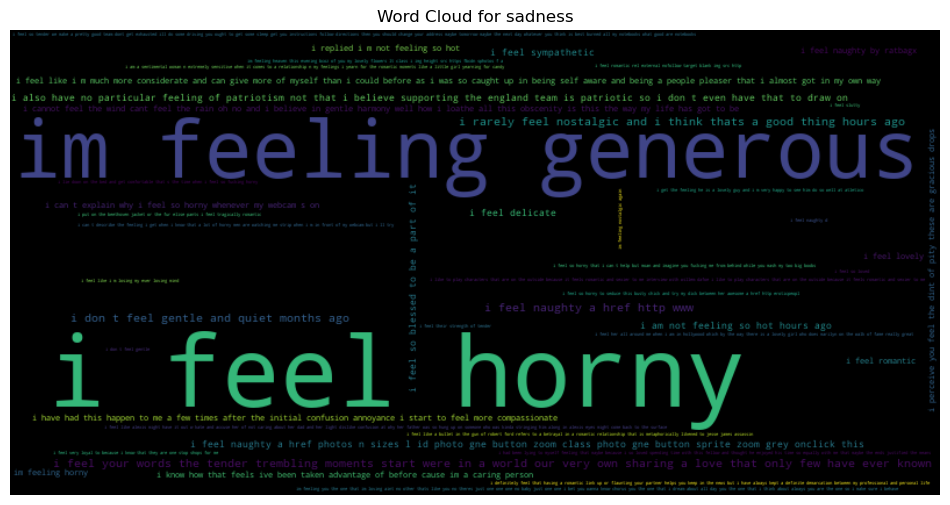

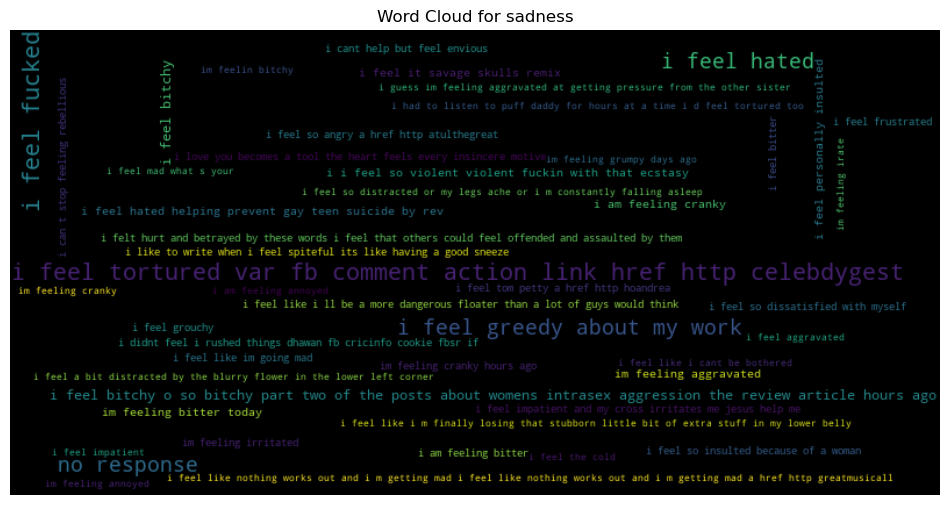

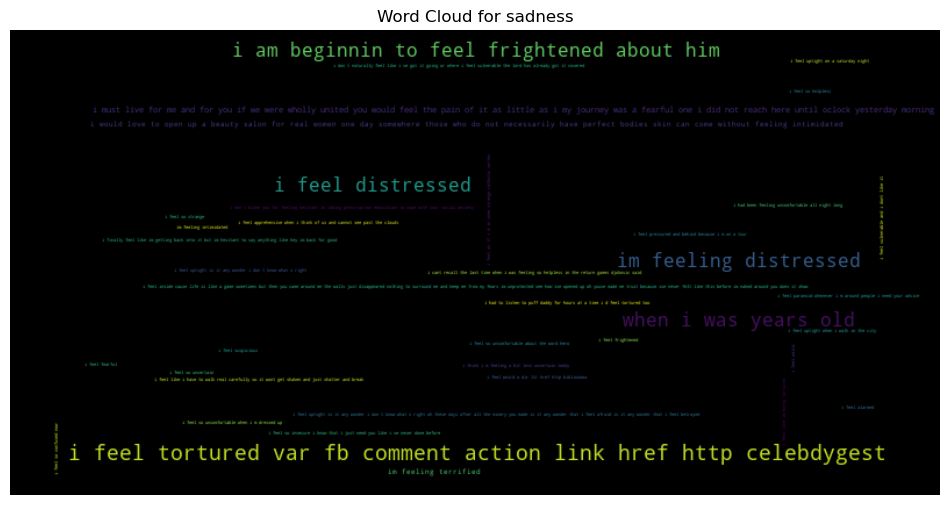

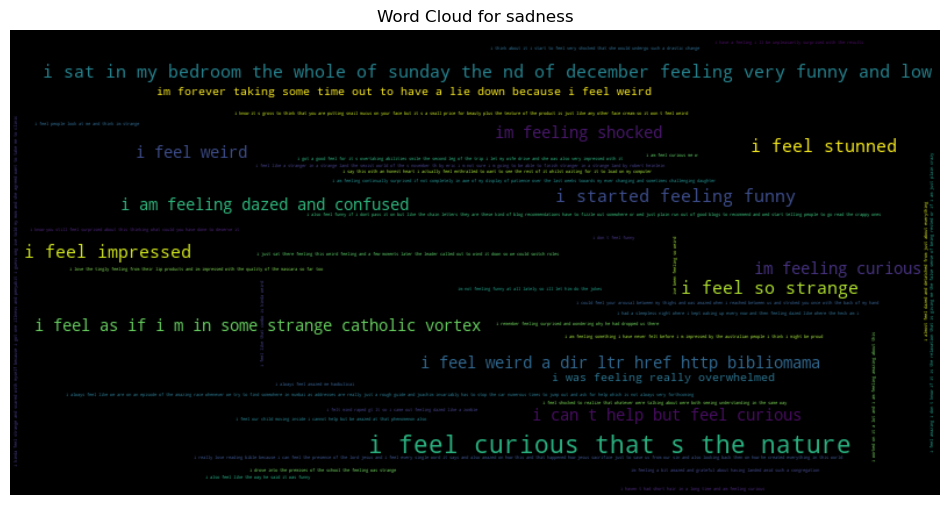

In [39]:
#Frequency of words
for i in range(6):
    data = text[text['label']==i]['text']
    
    fdist = FreqDist(data)
    #WordCloud
    wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
    plt.figure(figsize=(12,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Word cloud for '+label_dictionary[i])
    plt.show()